<a href="https://colab.research.google.com/github/kunalsir98/MUSHROOM_CLASSIFICATION/blob/main/Ann_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
!nvidia-smi

Sun Feb 11 09:25:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version {tf.__version__}")


Tensorflow Version 2.15.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
ROOT='/content/drive/MyDrive/deep learning'
os.chdir(ROOT)

In [ ]:
!pwd

/content/drive/MyDrive/deep learning


In [ ]:
os.getcwd()

'/content/drive/MyDrive/deep learning'

GPU/CPU CHECK


In [ ]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")


GPU is available!
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


LOAD MNIST data



In [ ]:
mnist = tf.keras.datasets.mnist
(X_train_full,y_train_full),(X_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train_full


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
y_train_full.shape

(60000,)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

<Axes: >

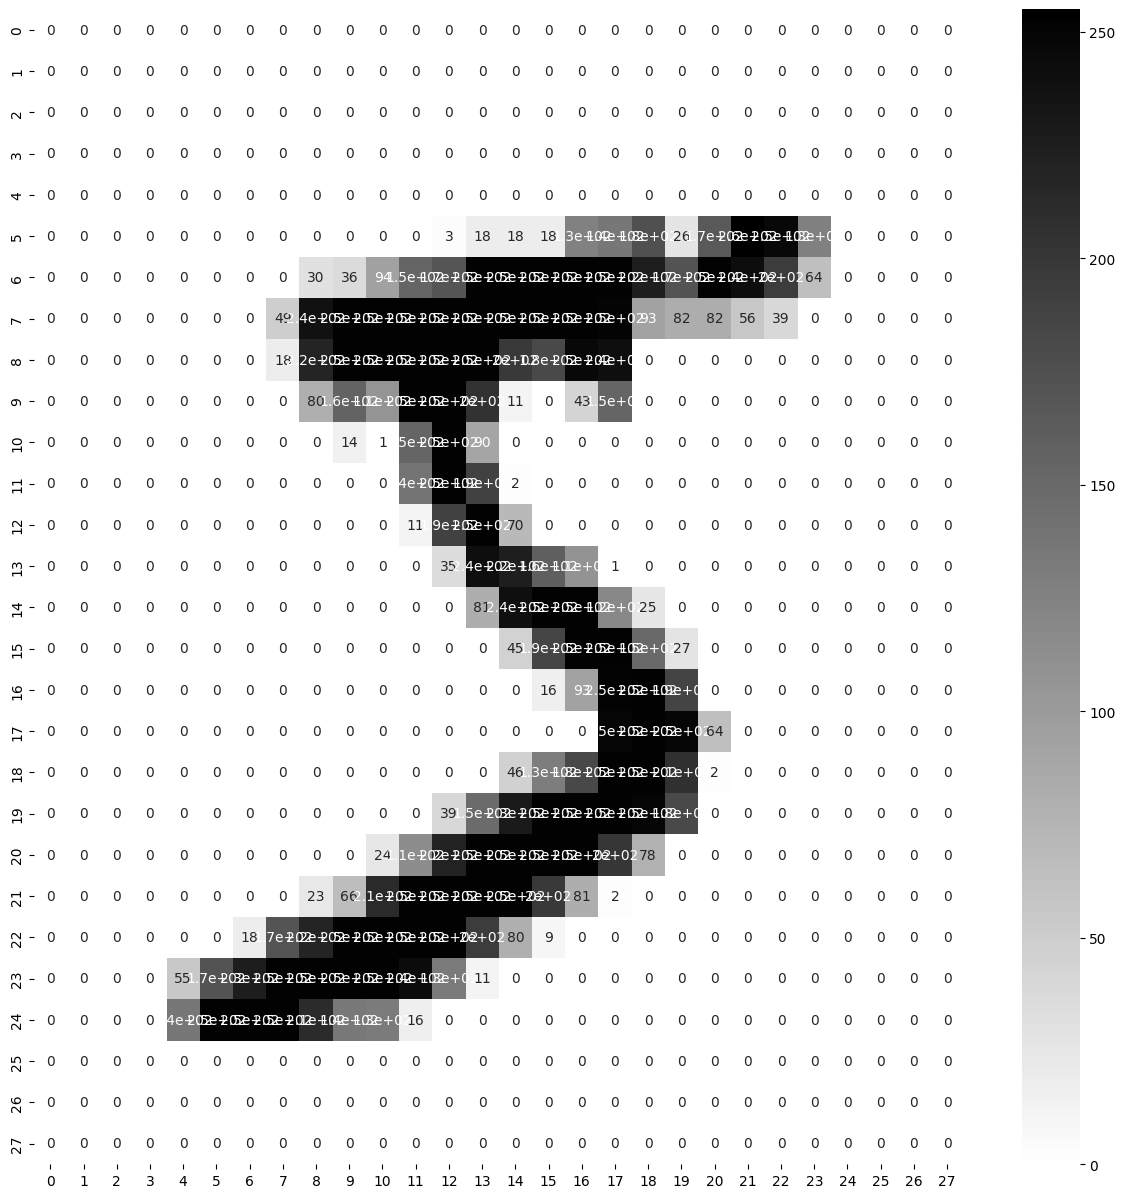

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train_full[0], annot=True, cmap='binary')

In [ ]:
# Applying scaling(minmax)
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.




In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_valid.shape

(5000, 28, 28)

<Axes: >

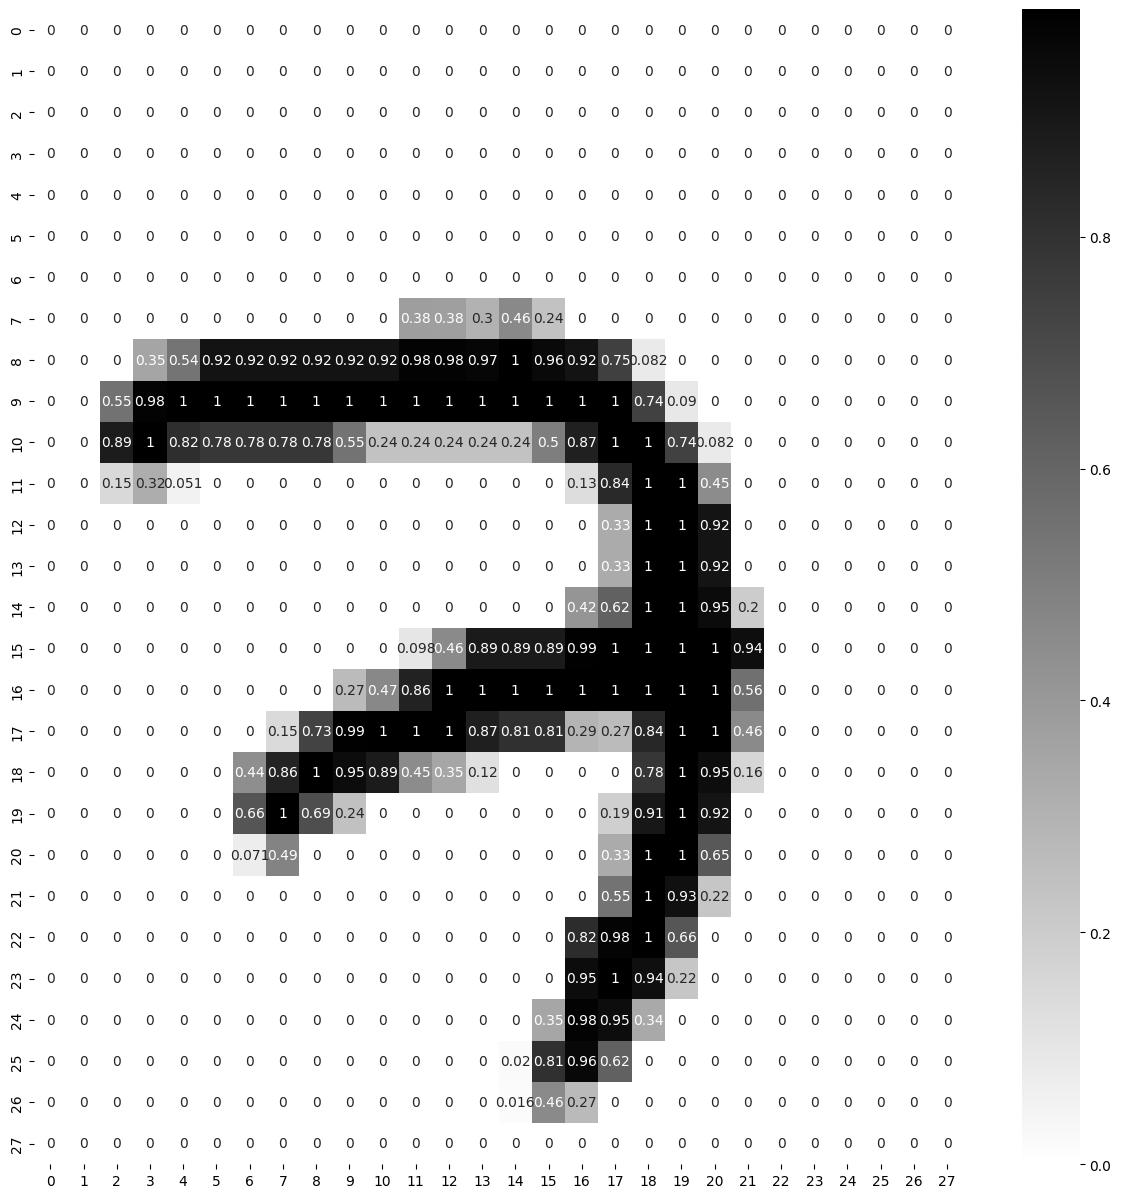

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap='binary')

In [ ]:
LAYERS=[
    tf.keras.layers.Flatten(input_shape=[28,28], name= 'inputLayer'),
    tf.keras.layers.Dense(300,activation='relu',name='hiddenLayer1'),
    tf.keras.layers.Dense(100,activation='relu', name='hiddenLayer2'),
    tf.keras.layers.Dense(100,activation='softmax', name='outputLayer')

]
model_clf=tf.keras.models.Sequential(LAYERS)

In [ ]:
28*28

784

In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 100)               10100     
                                                                 
Total params: 275700 (1.05 MB)
Trainable params: 275700 (1.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                 metrics=METRICS )


TENSERBOARD CALL FUNCTIONS


In [ ]:
# Log

import time

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit/log_2024_02_11_11_20_22


EARLY STOPPING CALLBACK

In [ ]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

MODEL CHECK POINT CALLBACKS

In [ ]:
CKPT_path = "Model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [ ]:
EPOCHS=10
VALIDATTION_SET=(X_valid,y_valid)

history=model_clf.fit(X_train,y_train,epochs=EPOCHS,
                      validation_data=VALIDATTION_SET,batch_size=32, callbacks=[tb_cb,early_stopping_cb,checkpointing_cb  ])

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7411 - accuracy: 0.8197 - val_loss: 0.3193 - val_accuracy: 0.9116
Epoch 2/10
  51/1719 [..............................] - ETA: 5s - loss: 0.3555 - accuracy: 0.8915

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1719/1719 [==============================] - 6s 3ms/step - loss: 0.3098 - accuracy: 0.9120 - val_loss: 0.2554 - val_accuracy: 0.9248
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2577 - accuracy: 0.9272 - val_loss: 0.2264 - val_accuracy: 0.9378
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2229 - accuracy: 0.9371 - val_loss: 0.1976 - val_accuracy: 0.9476
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1956 - accuracy: 0.9445 - val_loss: 0.1764 - val_accuracy: 0.9516
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1732 - accuracy: 0.9507 - val_loss: 0.1555 - val_accuracy: 0.9584
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1547 - accuracy: 0.9557 - val_loss: 0.1508 - val_accuracy: 0.9582
Epoch 8/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1391 - accuracy: 0.9613 - val_loss: 0.1326 - val_accuracy: 0.9644
Epo

SAVING THE MODEL

In [ ]:
import time
import os

def save_model_path(MODEL_dir = "TRAINED_MODEL"):
  os.makedirs(MODEL_dir, exist_ok= True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(MODEL_dir, fileName)
  print(f"Model {fileName} will be saved at {model_path}")
  return model_path

In [ ]:
UNIQUE_PATH = save_model_path()
UNIQUE_PATH

Model Model_2024_02_11_11_42_24_.h5 will be saved at TRAINED_MODEL/Model_2024_02_11_11_42_24_.h5


'TRAINED_MODEL/Model_2024_02_11_11_42_24_.h5'

In [ ]:
tf.keras.models.save_model(model_clf, UNIQUE_PATH)

<ipython-input-60-87cef6f4b7ac>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model_clf, UNIQUE_PATH)


In [ ]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [ ]:
# history.history

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.741072,0.819709,0.319342,0.9116
1,0.309770,0.911982,0.255393,0.9248
2,0.257750,0.927164,0.226428,0.9378
3,0.222872,0.937055,0.197554,0.9476
4,0.195616,0.944491,0.176402,0.9516
5,0.173167,0.950691,0.155480,0.9584
6,0.154691,0.955745,0.150788,0.9582
7,0.139069,0.961273,0.132586,0.9644
8,0.126383,0.964400,0.129226,0.9646
9,0.114913,0.968127,0.116628,0.9680


<Axes: >

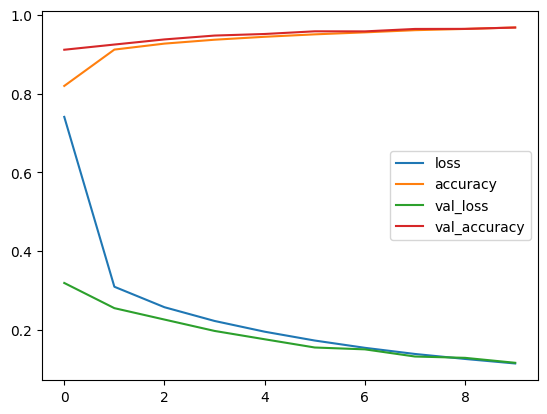

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1187 - accuracy: 0.9645


[0.11865884810686111, 0.9645000100135803]

In [ ]:
x_new = X_test[:3]
# x_new

In [ ]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [ ]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 122ms/step


array([[0.   , 0.   , 0.001, 0.002, 0.   , 0.   , 0.   , 0.996, 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.999, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.  

In [ ]:
y_pred = np.argmax(y_prob, axis = -1)

In [ ]:
y_pred

array([7, 2, 1])

In [ ]:
actual

array([7, 2, 1], dtype=uint8)

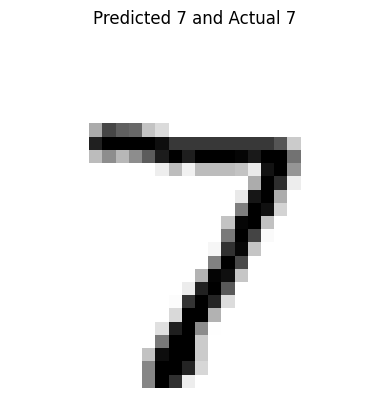

######################


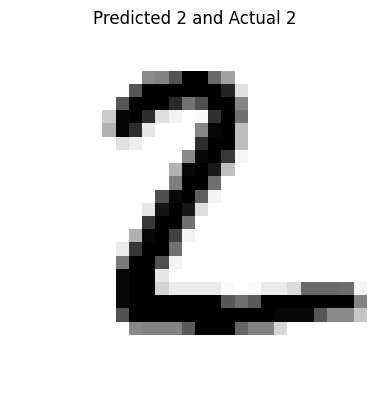

######################


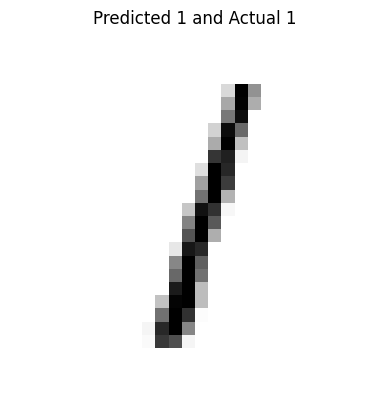

######################


In [ ]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################")